### Generatori ai distributilor de probabilitate din Numpy. Histograme

Biblioteca `numpy.random` contine functii ce implementeaza algoritmi de simulare a diverse distributii de probabilitate
discrete sau continue.

Numerele pseudo-aleatoare uniform distribuite pe $[0,1)$ sunt generate de functia
`numpy.random.random()`, care se bazeaza pe generatorul Mersenne-Twister.
Definitia functiei este:

`numpy.random.random(size=None)`

unde `size` este cuvantul cheie ce indica daca se returneaza un singur numar $u\in[0,1)$ sau un array, ale carui dimensiuni se indica printr-un tuple.

Seed-ul generatorului se poate seta printr-un numar intreg (vezi si codul `C` al generatorului Mersenne-Twister) astfel:
`numpy.random.seed(numar)`.

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [18]:
u=np.random.random()
print u

0.389913864451


In [19]:
v=np.random.random(5)
print v

[ 0.7197952   0.00909052  0.22430714  0.68550707  0.56031171]


In [20]:
A=np.random.random((2,3))
print A

[[ 0.22980472  0.18916712  0.88043825]
 [ 0.13131647  0.12812562  0.64125757]]


Seed-ul  se seteaza in perioada de debugging a codului, pentru ca avandu-l setat in orice rulare se genereaza acelasi sir de numere.

Daca nu este setat explicit, atunci `Numpy` alege un seed aleator bazat pe momentul de timp al lansarii in executie a codului.


Pentru a ilustra ca  o functie genereaza valori de observatie asupra unei variabile aleatoare de distributie prescrisa, se asociaza sirului de date histograma si se traseaza peste histograma graficul densitatii
distributiei respective, pentru comparatie.

Sa generam de exemplu 2000 de valori de observatie asupra unei v.a. $U\sim Unif[0,1)$ si apoi sa desenem
                                                                            histograma datelor cu un numar prescris de bare.
                                                                            

Functia care genereaza histograma este:
    
`matplotlib.pyplot.hist()` pe care o apelam simplu, `plt.hist`.

Argumentele si cuvintele cheie uzuale ale functiei sunt:
- `x` este array-ul ce contine datele
- `bins=10`  numarul de bare; implicit 10
- `range=None`, `range` reprezinta limitele valorilor din x intre care generam histograma. Daca 
nu este setat, atunci se genereaza histograma datelor cuprinse in intervalul `[xmin, xmax]`.
- `normed=False` (implicit) sau `True`; 

Daca  `normed=True`, atunci bara corespunzatoare fiecarui interval
de divizare a datelor are aria egala cu (vezi algoritmul prezentat in Cursul 10):

$\displaystyle\frac{nr.\: valori\: din\: interval}{nr\: total\: de\: valori}$

Daca `normed=False`, atunci bara are aria egala cu lungimea bazei ori numarul de valori ce apartin intervalului corespunzator barei.

- `color=None`; acest cuvant cheie seteaza culoarea barelor in histograma.




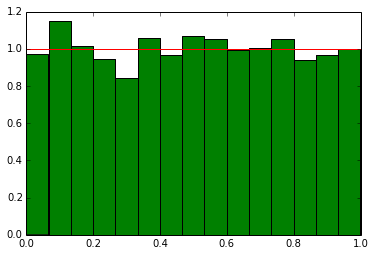

In [21]:
x=np.random.random(2000)
histo=plt.hist(x, bins=15, normed=True, color='g')
plt.plot([0,1], [1,1], 'r')# graficul densitatii uniforme pe [0,1)

Functia `np.random.exponential(theta, size=None)` returneaza valori de observatie asupra unei variabile aleatoare exponential distribuita, de parametru $\theta=theta$.



Functia care evalueaza  densitatea distributiei $Exp(\theta)$:

In [22]:
def fexpo(theta, x):
    return  np.exp(-x/theta)/theta

Generam N valori de observatie asupra distributiei $Exp(\theta)$, afisam histograma valorilor
generate si desenam comparativ graficul densitatii:

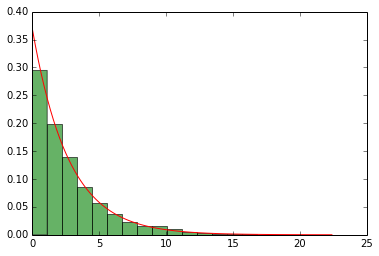

In [23]:
theta=2.7
N=2000# nr de valori generate
x=np.random.exponential(theta, N)
histo=plt.hist(x, bins=20, normed=True, color='g', alpha=0.6)
xmin=np.min(x)
xmax=np.max(x)
M=100
X=np.linspace(xmin, xmax, M)
Y=fexpo(theta, X)
plt.plot(X,Y, 'r')#traseaza graficul densitatii exponentiale

Functia `np.random.exponential` implementeaza algoritmul de simulare a distributiei Exp prin metoda inversarii
(Cursul 12).

La proiectul in `C/C++`, valorile generate vor fi salvate intr-un fisier text, care apoi este citit
in Python pentru a afisa histograma sau alte obiecte grafice.

Dam un exemplu de citire a unui fisier text, salvat in directorul curent si apoi generam histograma datelor
citite.



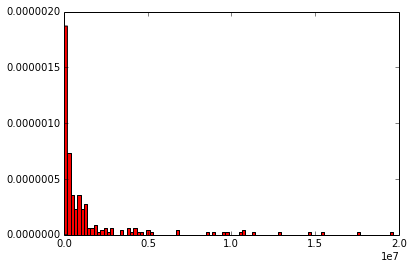

In [24]:
val = np.loadtxt("Vizite.txt")
histog=plt.hist(val,bins=100, normed=True, color='r')

Fisierul `Vizite.txt` contine numarul de vizite ale site-urilor monitorizate de [sati](http://www.brat.ro/sati/rezultate/type/site-ro/period_type/month/period_filter/2014-3/category/all/editor/all) in luna martie.

Histograma ilustreaza ca o proportie mare din numarul de site-uri monitorizate sunt vizitate de un  numar redus de ori si doar cateva sunt vizitate foarte mult.

In [1]:
from IPython.core.display import HTML
def  css_styling():
    styles = open("./custom.css", "r").read()
    return HTML(styles)
css_styling()